## A Logistic Regression Multi-Class classifier using the 470-feature data set.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score
from sklearn import preprocessing

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

In [2]:
len(df.index)

11598

In [3]:
features = df.iloc[0:11598,0:469].values
y = df['Class'].values

In [4]:
features_train, features_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=42)

In [5]:
scaler = preprocessing.StandardScaler().fit(features_train)

In [6]:
features_scaled = scaler.transform(features_train)

In [7]:
clf = LogisticRegression(max_iter=1000)
clf.fit(features_scaled, y_train)

LogisticRegression(max_iter=1000)

In [8]:
cross_val_score(clf, features_scaled, y_train, cv=5, scoring="accuracy", verbose=True)

array([0.86530172, 0.87661638, 0.8674569 , 0.85390836, 0.85983827])

In [9]:
y_train_pred = cross_val_predict(clf, features_scaled, y_train, cv=5)

In [10]:
confusion_matrix(y_train, y_train_pred)

array([[ 703,  103,   80,   76,   29],
       [  63, 1412,  113,   62,   26],
       [   2,   47, 3040,   27,    2],
       [  68,   99,  150, 1682,   47],
       [  48,   58,   76,   80, 1185]])

In [11]:
test_scaler = preprocessing.StandardScaler().fit(features_test)

In [12]:
features_scaled = scaler.transform(features_test)

In [13]:
y_test_pred = cross_val_predict(clf, features_scaled, y_test, cv=3)

In [14]:
confusion_matrix(y_test, y_test_pred)

array([[176,  28,  21,  31,   6],
       [ 18, 324,  40,  36,   6],
       [  0,  24, 747,  10,   5],
       [ 22,  45,  45, 374,  14],
       [ 18,  17,  29,  41, 243]])

In [15]:
multilabel_confusion_matrix(y_test, y_test_pred)

array([[[2000,   58],
        [  86,  176]],

       [[1782,  114],
        [ 100,  324]],

       [[1399,  135],
        [  39,  747]],

       [[1702,  118],
        [ 126,  374]],

       [[1941,   31],
        [ 105,  243]]])

In [16]:
confusion_matrix(y_test, y_test_pred, normalize='all')

array([[0.07586207, 0.01206897, 0.00905172, 0.01336207, 0.00258621],
       [0.00775862, 0.13965517, 0.01724138, 0.01551724, 0.00258621],
       [0.        , 0.01034483, 0.32198276, 0.00431034, 0.00215517],
       [0.00948276, 0.01939655, 0.01939655, 0.1612069 , 0.00603448],
       [0.00775862, 0.00732759, 0.0125    , 0.01767241, 0.10474138]])

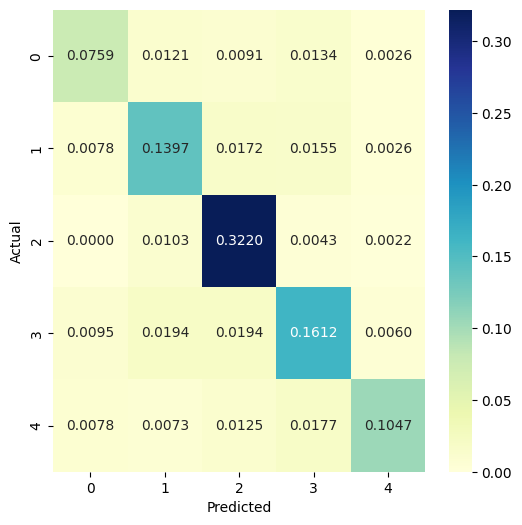

In [17]:
cm = confusion_matrix(y_test, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [18]:
accuracy_score (y_test, y_test_pred)

0.803448275862069

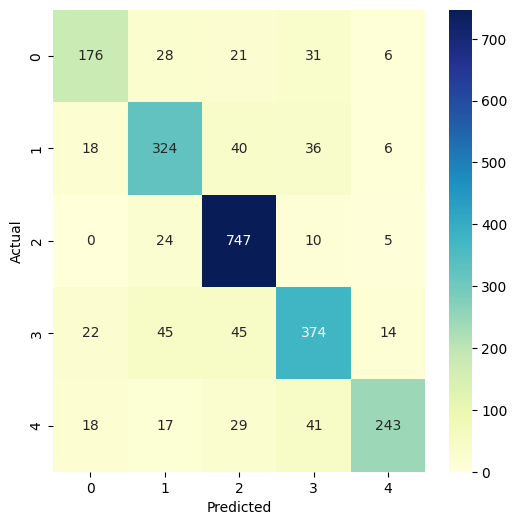

In [20]:
cm = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)